## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = pd.merge(study_results_df, mouse_metadata_df, 
                      how='outer', on="Mouse ID")
# Display the data table for preview
combined_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.

number_of_mice = combined_df["Mouse ID"].value_counts()
number_of_mice

g989    13
n304    10
b879    10
k483    10
q597    10
        ..
h428     1
d133     1
u153     1
l872     1
t573     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint"])]
                             
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = combined_df.loc[combined_df["Mouse ID"] == "g989",:]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = combined_df[combined_df['Mouse ID'] != 'g989']
clean_df.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.

clean_mice = clean_df["Mouse ID"].value_counts()
clean_mice

c559    10
s508    10
o331    10
a251    10
a492    10
        ..
o848     1
f932     1
x226     1
n482     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
# tumor volume for each regimen

mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]

median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

variance_tumor = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

standard_var_tumor = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

sem_tutor_volume = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_stat_df = pd.DataFrame({"Mean": mean_tumor_volume,
                               "Median": median_tumor_volume,
                               "Variance": variance_tumor,
                               "Standard Deviation": standard_var_tumor,
                               "SEM": sem_tutor_volume})
summary_stat_df 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen

# This method produces everything in a single groupby function

# summary_stat_2_df = clean_df.groupby("Drug Regimen")
# summary_stat_2_df = summary_stat_2_df["Tumor Volume (mm3)"]
# summary_stat_2_df.describe()

summary_stat_2_df = clean_df.groupby("Drug Regimen")
summary_stat_2_df["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, stats.sem])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

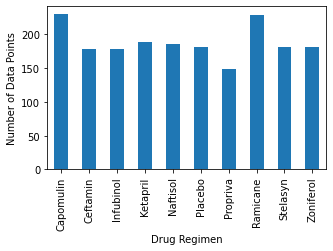

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course 
# of the study using pandas. 

#set the dataframe to what we want to show
pandas_bar_chart = clean_df.groupby("Drug Regimen").count()
pandas_bar_chart = pandas_bar_chart["Timepoint"]
# pandas_bar_chart

# # Plot chart using pandas 
pandas_bar_chart.plot(kind="bar", figsize=(5,3))

# # Add axis and title  
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course 
# of the study using pyplot.

pyplot_bar_chart_df = clean_df.groupby("Drug Regimen").count()

pyplot_bar_chart_timepoint_df = pyplot_bar_chart_df["Timepoint"]

# pyplot_bar_chart_df_timepoint

# Reset index for x values 

pyplot_bar_chart_df = pyplot_bar_chart_df.reset_index()

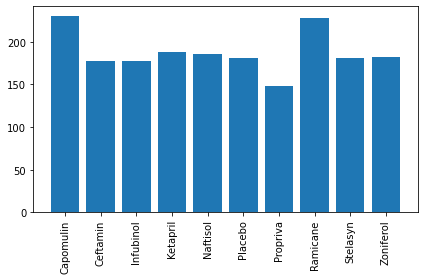

In [11]:
# Pyplot the chart 

x_axis = np.arange(len(pyplot_bar_chart_timepoint_df))

plt.bar(x_axis, pyplot_bar_chart_timepoint_df, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, pyplot_bar_chart_df["Drug Regimen"], rotation="vertical")

# add y axis 

plt.tight_layout()

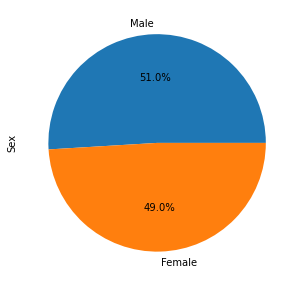

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

male_vs_female_df = clean_df["Sex"].value_counts()


male_vs_female_df = male_vs_female_df.plot(kind="pie", autopct="%1.1f%%", figsize=(5,5))


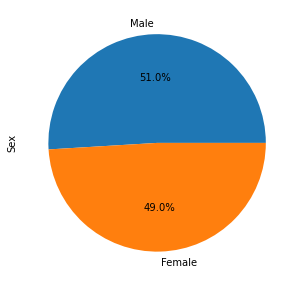

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create series for the mice by sex 

male_vs_female_df = clean_df["Sex"].value_counts()


# Plot the chart 

pyplot_pie = male_vs_female_df.plot.pie(y='Sex', autopct="%1.1f%%", 
                                        figsize=(5, 5))



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Filter the Dataframa to 4 drugs 
filtered_drug_df = clean_df.set_index("Drug Regimen")
# filtered_drug_df 


filtered_drug_df = filtered_drug_df.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
# filtered_drug_df

# # # Start by getting the last (greatest) timepoint for each mouse
 
mice_drug_df = filtered_drug_df.groupby("Mouse ID")["Timepoint"].max()
mice_drug_df = mice_drug_df.reset_index()
filtered_mice = mice_drug_df

combined_drugs_df = filtered_mice.merge(clean_df, on=["Mouse ID", "Timepoint"], how='left')
combined_drugs_df

combined_drugs_df.head(5)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_tumor_vol = combined_drugs_df.loc[combined_drugs_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol.append(final_tumor_vol)
    
#     Set up Quartiles 
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# print(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    volume_outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    volume_outliers
    
#     print results 
    print(f" {treatment} 's potential outliers: {volume_outliers}")
    


 Capomulin 's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane 's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol 's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin 's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

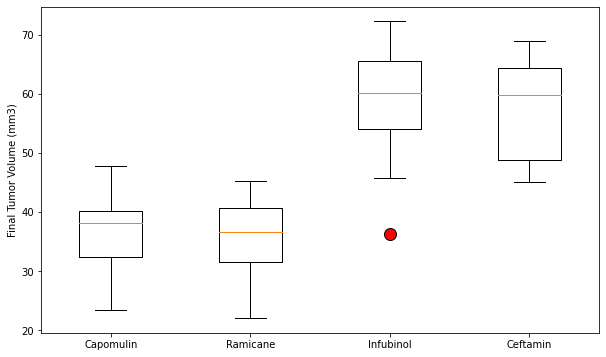

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# plot the box and whisker plot 
fig1, ax1 = plt.subplots(figsize=(10, 6))

# Set xlabels 
labels = list(treatments)


flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='none') 

plt.boxplot(tumor_vol, flierprops=flierprops, labels=labels)

# Set y label 
ax1.set_ylabel('Final Tumor Volume (mm3)')




## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

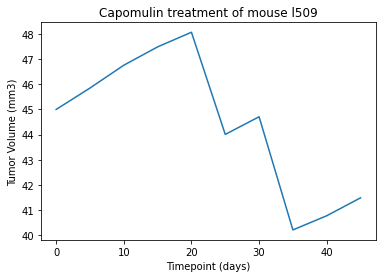

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


# Filter the Dataframa to drug Capomulin
Line_filter_df = clean_df.set_index("Drug Regimen")
Line_filter_df = Line_filter_df.loc["Capomulin"]


#Filter data frame to mouse L509
Line_by_mouse  = Line_filter_df.set_index("Mouse ID")
Line_by_mouse = Line_by_mouse.loc["l509"]

# Set axis 
time_point = Line_by_mouse["Timepoint"]
tumor = Line_by_mouse["Tumor Volume (mm3)"]

# plot graph 
plt.plot(time_point, tumor)

#add axis titles 
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")



Text(0.5, 0, 'Weight (g)')

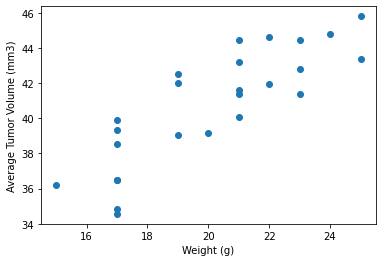

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

## Calcuatate the average tumor volume 

#filter dataframe to tumor volume. Use previous data frame that has been filtered down to Capomulin and
# reset Index 

scatter_filter_df = Line_filter_df.reset_index()

# Group by the mouse and get the mean of the tumor volumes 
scatter_filter_df = scatter_filter_df.groupby("Mouse ID").mean("Tumor Volume(mm3)")
# scatter_filter_df

# define the x and y axis 

capoulin_mean = scatter_filter_df["Tumor Volume (mm3)"]
mouse_weight = scatter_filter_df["Weight (g)"]

#plot scatter graph 
plt.scatter(mouse_weight, capoulin_mean)

# add the x and y labels
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


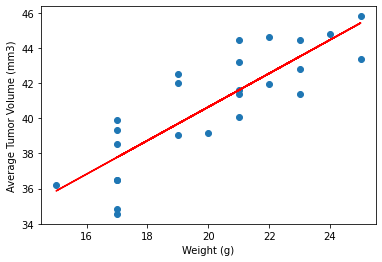

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add the line
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, capoulin_mean)

# Plot the chart again 
plt.scatter(mouse_weight, capoulin_mean)

# make the line red
regress_values = mouse_weight * slope + intercept
plt.plot(mouse_weight,regress_values,"r-")

# label the axis 
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(mouse_weight, capoulin_mean)[0],2)}")


Observations and Insights 

1. The correlation between mouse weight and tumor volume is strong. As the Mouse weight increases, so does the tumor volume. Mice that weigh more seem to have a larger tumor volume.  
2. Drug Regimen Infubinol has an outlier result that is more representative of the results from Capomulin and Ramicane. This is likely to be a specific mouse result rather than an accurate reflection of the effects of the drug. Or it could be an error, since we should wary of outliers. 
3. The most effective drugs appear to be Ramicane and Capomulin. They both have a decrease in the average tumor volume to less than 45. However it is worth nothing that these drugs also had the highest number of treatments, which may have impacted the results.  
